In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

# Load the dataset
dataset = pd.read_csv('/content/Wholesale customers data.csv')

In [ ]:
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
dataset.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
dataset.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [ ]:
dataset.shape

(440, 8)

In [ ]:
dataset.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
435,False
436,False
437,False
438,False


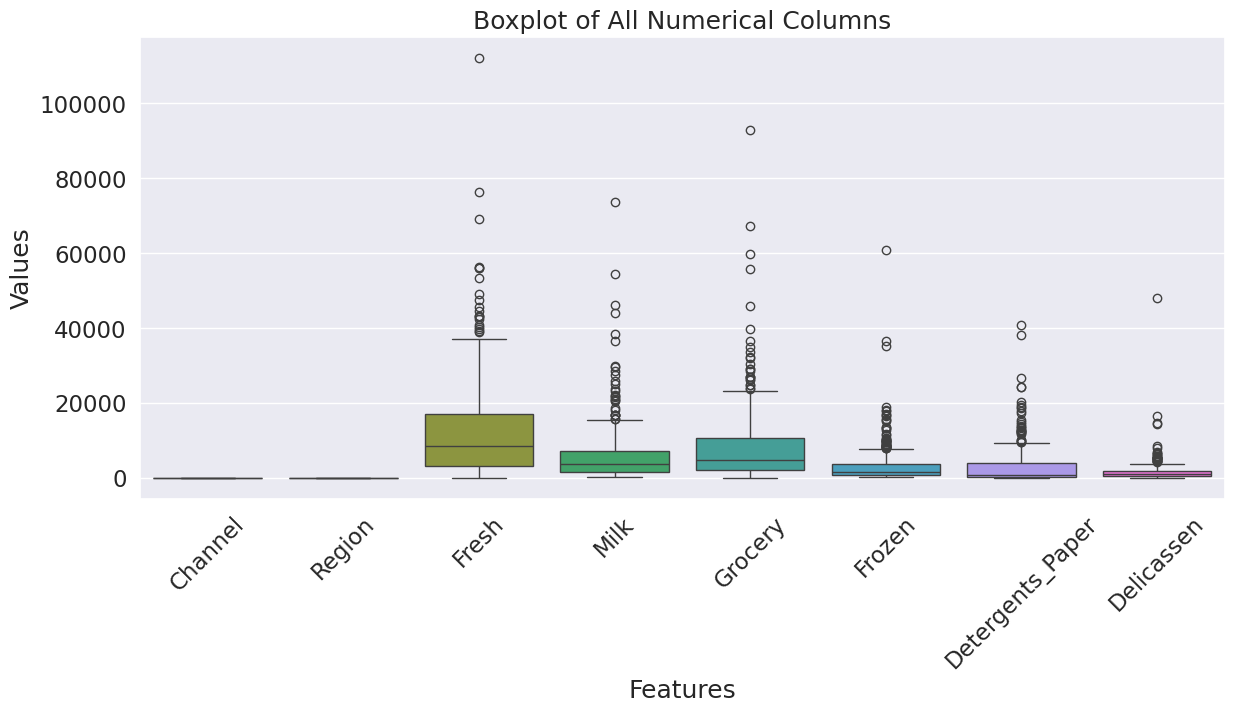

In [ ]:

plt.figure(figsize=(14, 6))
sns.boxplot(data=dataset)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title("Boxplot of All Numerical Columns")
plt.xlabel("Features")
plt.ylabel("Values")

# Show plot
plt.show()


array([[<Axes: title={'center': 'Channel'}>,
        <Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'Fresh'}>],
       [<Axes: title={'center': 'Milk'}>,
        <Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>, <Axes: >]], dtype=object)

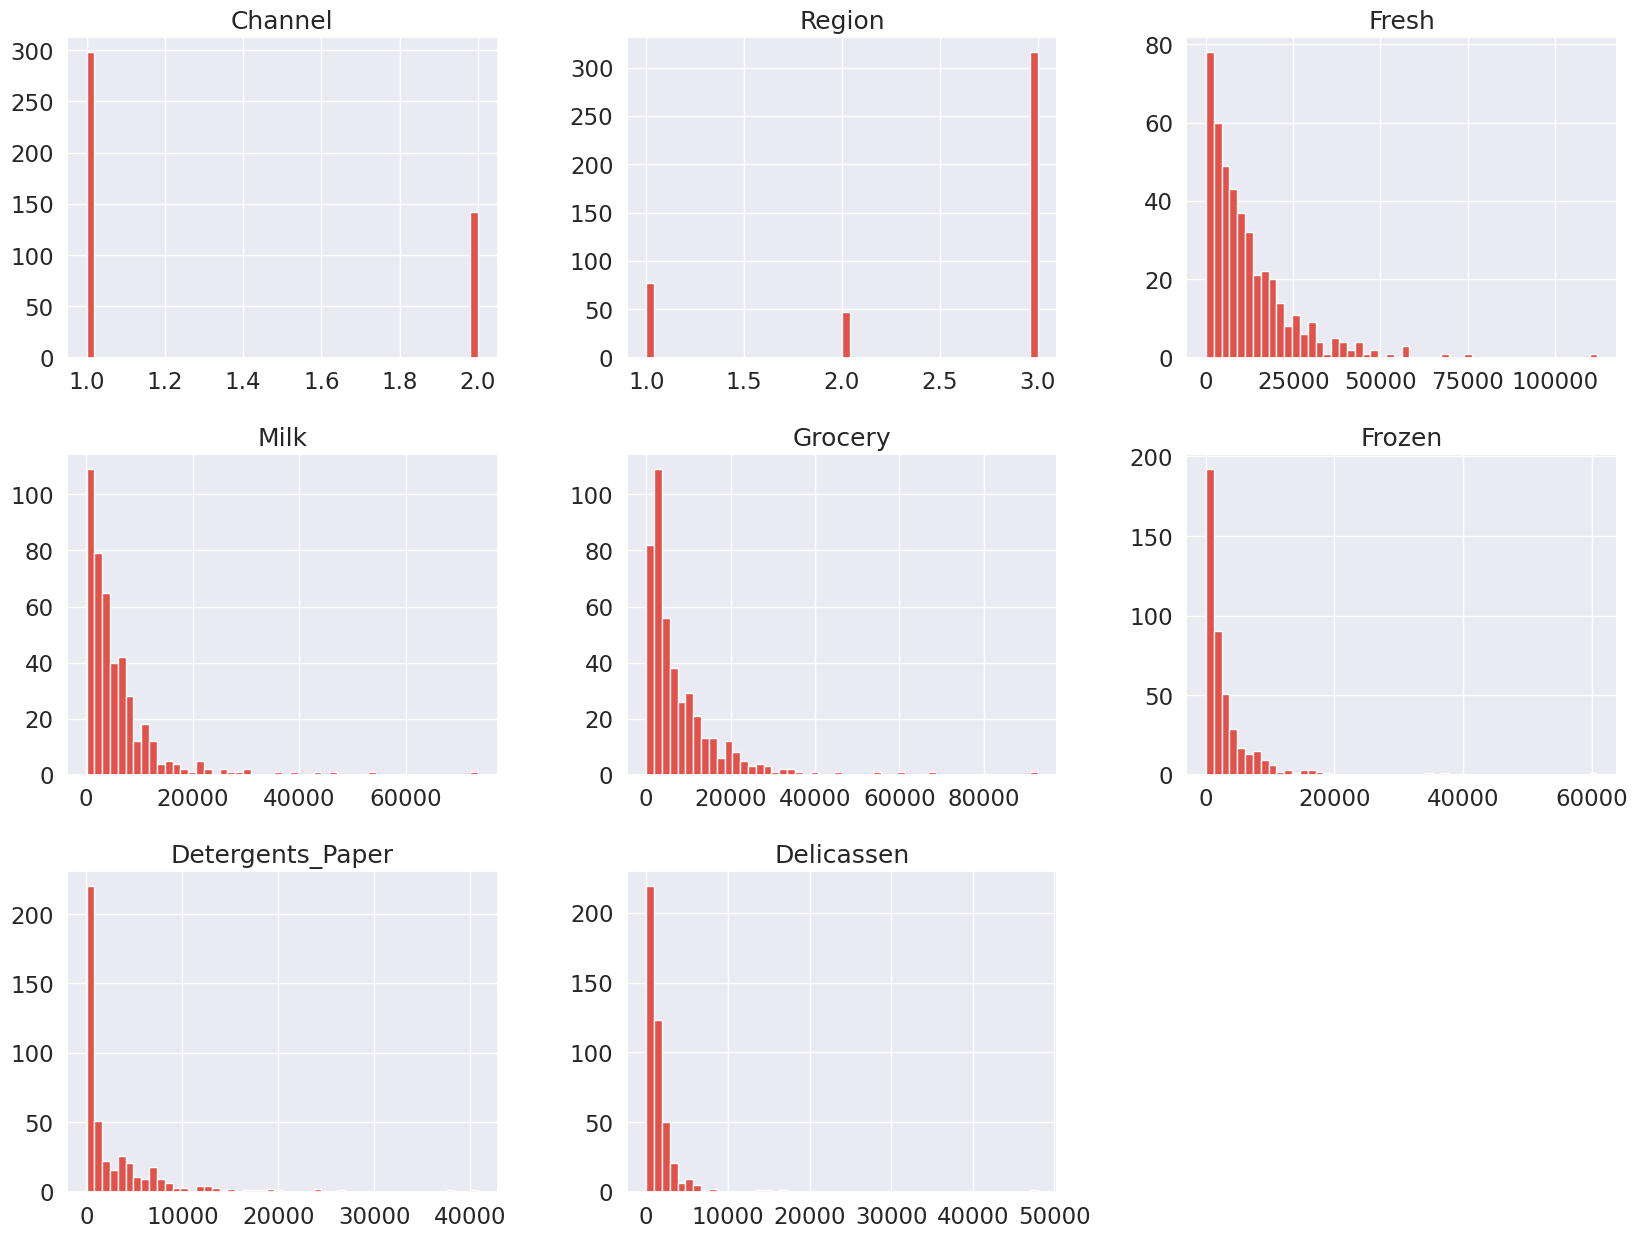

In [ ]:
dataset.hist(bins=50, figsize=(20,15))


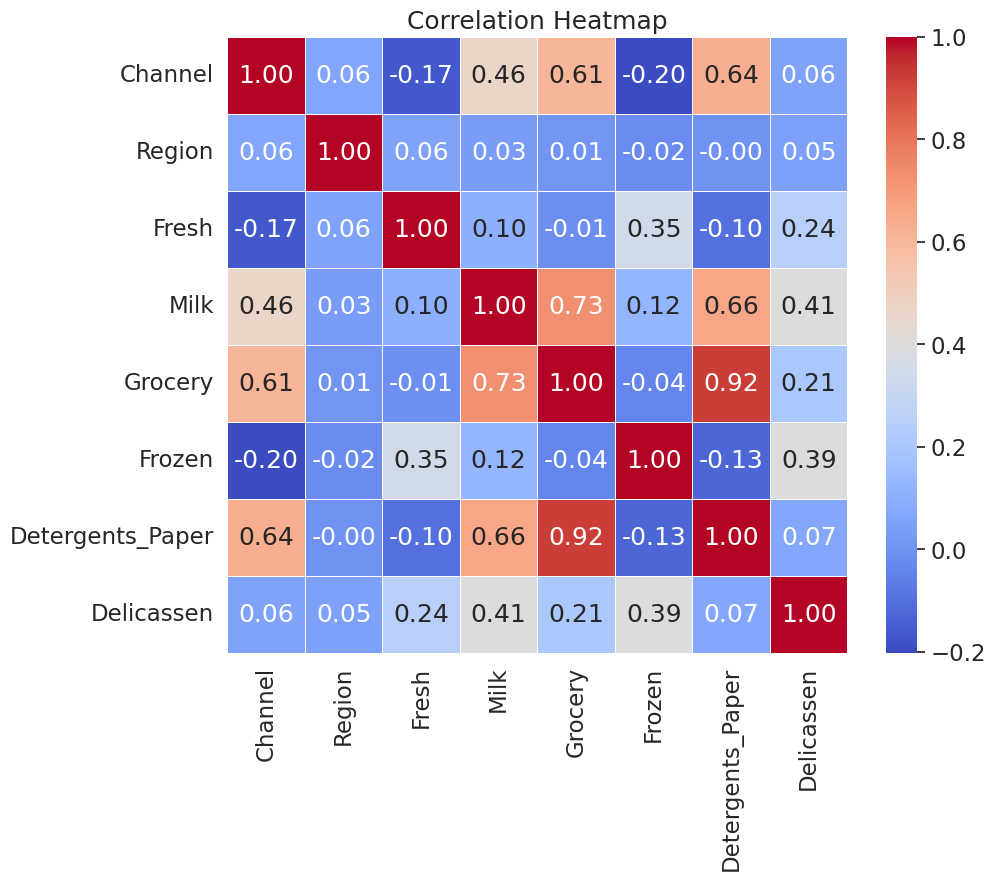

In [ ]:
# Compute the correlation matrix
corr = dataset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()


In [ ]:
dataset.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [ ]:
data=dataset.drop(['Channel','Region','Grocery'],axis=1)
data.head()

,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
0,12669,9656,214,2674,1338
1,7057,9810,1762,3293,1776
2,6353,8808,2405,3516,7844
3,13265,1196,6404,507,1788
4,22615,5410,3915,1777,5185


In [ ]:
data.describe()

,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,60869.000000,40827.000000,47943.000000


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
  k_model=KNeighborsClassifier(n_neighbors=k)
  k_model.fit(x_train,y_train)
  k_pred=k_model.predict(x_test)
  acc=accuracy_score(y_test,k_pred)
  metric_k.append(acc)
  plt.plot(neighbors,metric_k)


In [ ]:
k_model=KNeighborsClassifier(n_neighbors=5)
k_model.fit(x_train,y_train)
k_pred=k_model.predict(x_test)
acc=accuracy_score(y_test,k_pred)

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
inertia1=[]

for n in range(1 , 11):   # run this for k = 1 upto 10
    model1=KMeans(n_clusters=n, init='k-means++', n_init=20, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
    model1.fit(data)
    inertia1.append(model1.inertia_)

print(inertia1)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1408: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


[117949721617.43637, 73937635063.3344, 59436230486.43904, 46655079961.107216, 38218474244.6782, 32921999942.64767, 28400892523.072258, 25087395163.23758, 22851877480.721684, 20813485083.641872]


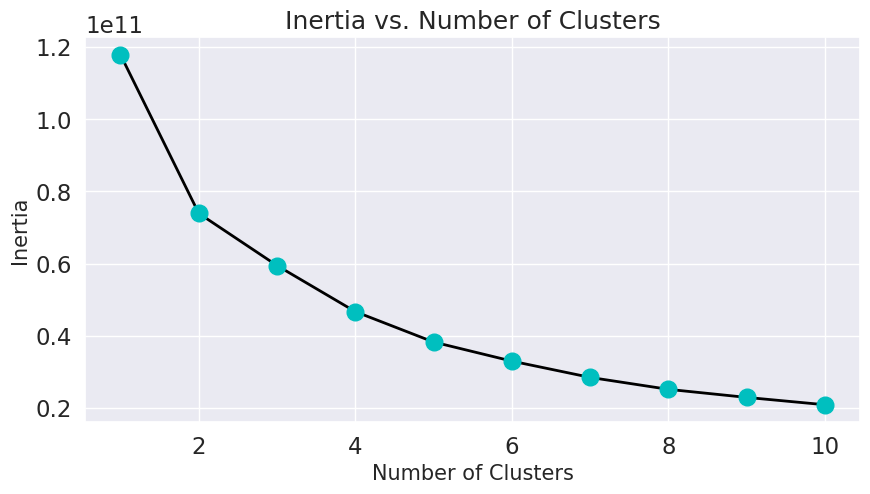

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(range(1,11)),inertia1 ,color='black', marker='o',linewidth=2, markersize=12, markerfacecolor='c', markeredgecolor='c')
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)
plt.title('Inertia vs. Number of Clusters',fontsize=18)
plt.show()

In [ ]:
#We can see that if the number of clusters is smaller than 5,
# the inertia has a high value but
# if the number of clusters is larger than 5, the inertia is relatively constant.
# So we choose 5 as the optimal number of clusters.

# Fitting K-Means to the dataset
# Assuming data was used to fit K-Means, ensure it has the correct features

model1 = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
                random_state=111, algorithm='elkan')
model1.fit(data)

labels1 = model1.labels_
centroids1 = model1.cluster_centers_  # Extract centroids

centroids1

array([[20567.47826087,  3977.95652174,  3977.89565217,  1311.34782609,
         1681.26086957],
       [49296.08695652,  4983.7826087 ,  8285.7826087 ,   962.26086957,
         2543.69565217],
       [ 4412.828125  , 13943.984375  ,  1689.53125   ,  9505.984375  ,
         1716.46875   ],
       [30445.        , 48782.66666667,  9122.83333333, 19390.83333333,
        12799.16666667],
       [ 5672.28448276,  3418.76724138,  2330.82758621,  1595.65517241,
         1001.9137931 ]])

In [ ]:
from sklearn.metrics import silhouette_score

# Compute silhouette score
silhouette_avg1 = silhouette_score(data, labels1)


In [ ]:
silhouette_avg1

np.float64(0.37835136158791544)

In [ ]:
# Davies-Bouldin Index (Lower is better)
from sklearn.metrics import davies_bouldin_score

davies_b1 = davies_bouldin_score(data, labels1)


In [ ]:
davies_b1

np.float64(0.9147124756776248)

In [ ]:
model2 = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
                random_state=111, algorithm='elkan')
model2.fit(data)

labels2 = model2.labels_
centroids2 = model2.cluster_centers_  # Extract centroids

centroids2

array([[ 4968.94258373,  3445.37320574,  2255.94258373,  1646.25837321,
          988.48325359],
       [ 4412.828125  , 13943.984375  ,  1689.53125   ,  9505.984375  ,
         1716.46875   ],
       [70943.83333333,  7688.83333333, 12737.83333333,  1483.16666667,
         3434.83333333],
       [35890.73529412,  5159.05882353,  6276.5       ,   904.05882353,
         2079.88235294],
       [30445.        , 48782.66666667,  9122.83333333, 19390.83333333,
        12799.16666667],
       [17608.12396694,  3501.00826446,  3532.75206612,  1317.55371901,
         1540.29752066]])

In [ ]:

# Compute silhouette score
silhouette_avg2 = silhouette_score(data, labels2)


In [ ]:
silhouette_avg2

np.float64(0.3547615864292067)

In [ ]:
model3 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
                random_state=111, algorithm='elkan')
model3.fit(data)

labels3 = model3.labels_
centroids3 = model3.cluster_centers_  # Extract centroids

centroids3

array([[49296.08695652,  4983.7826087 ,  8285.7826087 ,   962.26086957,
         2543.69565217],
       [ 5247.70138889,  5566.47222222,  2150.26041667,  3212.10069444,
         1140.10763889],
       [23120.55555556, 42042.88888889,  7257.88888889, 19155.66666667,
         9570.55555556],
       [20224.15      ,  3785.        ,  3970.675     ,  1235.325     ,
         1649.6       ]])

In [ ]:

# Compute silhouette score
silhouette_avg3 = silhouette_score(data, labels3)
silhouette_avg3


np.float64(0.39782532137697063)

In [ ]:
davies_b3 = davies_bouldin_score(data, labels3)


In [ ]:
davies_b3

np.float64(0.9009987648598572)

kmeans is not a good algorithm for this data

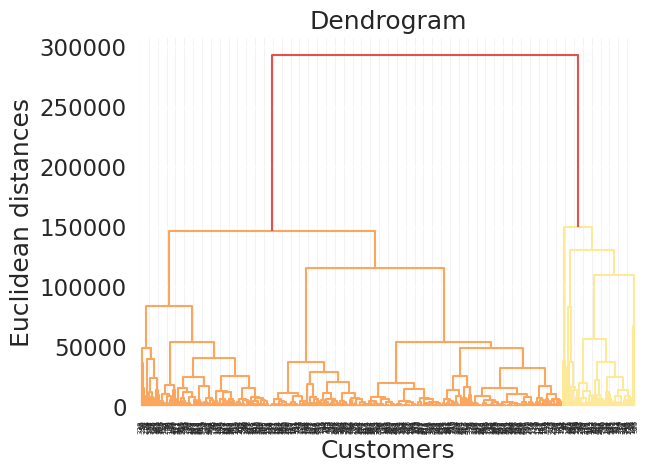

In [ ]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 4, linkage = 'ward')
y_hc = hc.fit_predict(data)
y_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 3, 3, 1, 0, 1, 0, 1, 3, 1, 1, 1, 1, 1,
       0, 3, 0, 1, 1, 1, 3, 0, 1, 1, 1, 0, 1, 3, 0, 3, 3, 0, 0, 1, 3, 3,
       3, 3, 3, 2, 3, 3, 1, 1, 0, 3, 0, 1, 3, 3, 1, 1, 1, 2, 1, 3, 1, 3,
       3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 2, 2, 0,
       1, 0, 1, 1, 3, 0, 3, 1, 3, 1, 1, 1, 3, 3, 3, 0, 1, 1, 3, 3, 3, 3,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 3, 0, 1, 1,
       1, 1, 1, 1, 3, 3, 1, 1, 1, 0, 0, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 3,
       1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3,
       0, 1, 1, 1, 1, 0, 3, 0, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 0, 3,
       1, 1, 3, 3, 0, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 0, 3, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       3, 3, 3, 1, 3, 1, 1, 1, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,

In [ ]:

silhouette_avg = silhouette_score(data, y_hc)
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_avg:.4f}')

db_score = davies_bouldin_score(data, y_hc)
print(f'Davies-Bouldin Index: {db_score:.4f}')


Silhouette Score for Agglomerative Clustering: 0.3082
Davies-Bouldin Index: 1.0104


In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')
y_hc = hc.fit_predict(data)
y_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:

silhouette_avg4 = silhouette_score(data, y_hc)
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_avg4:.4f}')

db_score4 = davies_bouldin_score(data, y_hc)
print(f'Davies-Bouldin Index: {db_score4:.4f}')


Silhouette Score for Agglomerative Clustering: 0.5583
Davies-Bouldin Index: 0.9654


# when the number of clusters is 2, the silhouette score increase.

In [ ]:
## Visualising the clusters using plotly
import plotly.express as px

# Create the scatter plot
fig = px.scatter(data, x='Fresh',y= 'Milk', color=y_hc.astype(str),
                 title='Hierarchical Clustering Visualization',
                 labels={'Cluster': 'Cluster'},
                 color_discrete_sequence=px.colors.qualitative.Set1)

# Show the plot
fig.show()



In [ ]:
# Create the scatter plot
fig = px.scatter(data, x='Detergents_Paper',y= 'Delicassen', color=y_hc.astype(str),
                 title='Hierarchical Clustering Visualization',
                 labels={'Cluster': 'Cluster'},
                 color_discrete_sequence=px.colors.qualitative.Set1)

# Show the plot
fig.show()


In [ ]:
from sklearn.decomposition import PCA


In [ ]:
# Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)
X_pca

array([[ 5.52070264e+02,  3.09972629e+03],
       [-4.69684238e+03,  4.06017588e+03],
       [-4.99367090e+03,  4.11272577e+03],
       [ 1.43810802e+03, -5.07074769e+03],
       [ 1.07849821e+04, -1.18840447e+03],
       [-2.66332672e+03,  1.75148895e+03],
       [-5.73823539e+02, -2.36372921e+03],
       [-4.57583623e+03, -1.07754745e+02],
       [-6.53542222e+03, -2.13726254e+03],
       [-5.81510013e+03,  7.20264244e+03],
       [-8.38825046e+03,  1.83363689e+03],
       [ 4.66023595e+02, -5.43248423e+03],
       [ 1.95582970e+04,  4.71840149e+03],
       [ 8.90966409e+03,  1.31778034e+03],
       [ 1.22913330e+04,  3.22563174e+03],
       [-2.54997339e+03, -5.07061656e+03],
       [-1.10425844e+04,  4.08200992e+03],
       [-6.05491404e+03, -9.50123421e+01],
       [ 6.50343275e+03,  7.65613888e+01],
       [-4.85662293e+03, -2.93212811e+03],
       [ 5.08162473e+03, -1.82479316e+03],
       [-6.68500055e+03, -5.07589096e+03],
       [ 1.97487649e+04, -4.53990569e+03],
       [ 1.

In [ ]:
# Apply K-Means clustering on PCA-transformed data
kmeans = KMeans(n_clusters=2, random_state=42)
labels_pca = kmeans.fit_predict(X_pca)

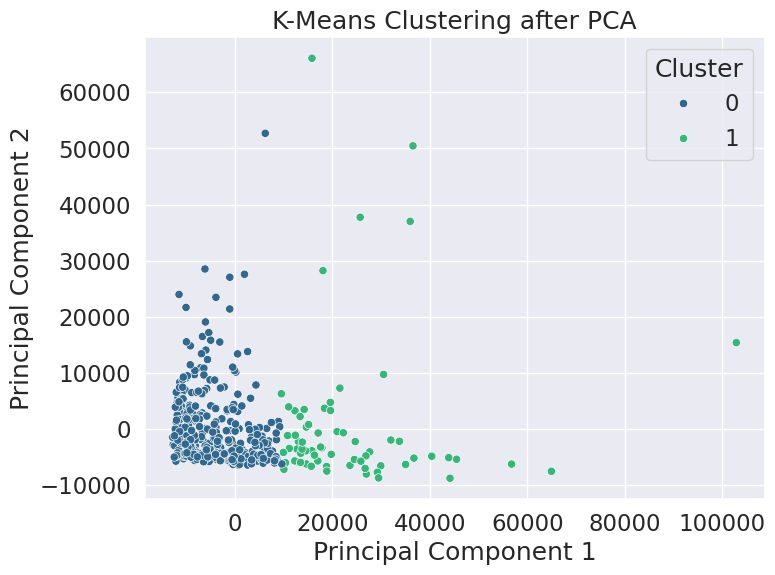

In [ ]:
# Scatter plot of PCA-reduced data with cluster labels
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_pca, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering after PCA')
plt.legend(title='Cluster')
plt.show()

In [ ]:
silhouette_pca = silhouette_score(X_pca, labels_pca)

# Compute Davies-Bouldin Score
davies_pca = davies_bouldin_score(X_pca, labels_pca)


In [ ]:
silhouette_pca

np.float64(0.586280341554489)

In [ ]:
davies_pca

np.float64(0.8086976758257769)

In [ ]:
from sklearn.cluster import DBSCAN

# Adjust eps and min_samples
dbs = DBSCAN(eps=5, min_samples=3)  # Increased eps to potentially find more clusters

y_dbs = dbs.fit_predict(data)

# Check the number of unique labels
n_clusters = len(set(y_dbs)) - (1 if -1 in y_dbs else 0)  # Exclude noise points (-1 label)

# Calculate silhouette score if there are at least 2 clusters
if n_clusters >= 2:
    sil_ach = silhouette_score(data, y_dbs)
    print(f"Silhouette Score for DBSCAN: {sil_ach:.4f}")
else:
    print("DBSCAN resulted in only one cluster or all points are considered noise. Silhouette score cannot be calculated.")

DBSCAN resulted in only one cluster or all points are considered noise. Silhouette score cannot be calculated.


**From DBSCAN there is only one cluster**